# TensorFlow Introduction

Welcome to the Tensorflow intro! This is the most high-level programming framework for Deep Learning, and you will need to become familiar with it. Using tensor flow, you will also be able to better understand Keras framework, which uses Tensorflow with some short cuts. In this lecture, you will learn how to: 

- Initialize variables
- Start your own session
- Train algorithms 
- Implement Logistic Regression using TensorFlow

Programing frameworks can not only shorten your coding time, but sometimes also perform optimizations that speed up your code. 

## 1 - Exploring the Tensorflow Library

To start, you will import the library:


In [8]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

Instructions for updating:
non-resource variables are not supported in the long term


Now that you have imported the library, we will walk you through its different applications. You will start with an example, where we compute for you the loss of one training example. 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [9]:
y_hat = tf.constant(37, name='y_hat')            # Define y_hat constant. Set to 37.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

4


Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are neither executed nor evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 

Therefore, when we created a variable for the loss, we simply defined the loss as a function of other quantities, but did not evaluate its value. To evaluate it, we had to run `init=tf.global_variables_initializer()`. That initialized the loss variable, and in the last line we were finally able to evaluate the value of `loss` and print its value. This approach makes the code more efficient, since evaluations only need to occur when they are needed and not every time.

Now let us look at an easy example. Run the cell below:

In [10]:
a = tf.constant(3)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


As expected, you will not see 30! You got a tensor saying that the result is a tensor that does not have the shape attribute, and is of type "int32". All you did was put in the 'computation graph', but you have not run this computation yet. In order to actually multiply the two numbers, you will have to create a session and run it.

In [11]:
sess = tf.Session()
print(sess.run(c))

30


Great! To summarize, **remember to initialize your variables, create a session and run the operations inside the session**. 

Next, you'll also have to know about placeholders. A placeholder is an object whose value you can specify only later. 
To specify values for a placeholder, you can pass in values by using a "feed dictionary" (`feed_dict` variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session. 

In [12]:
# Change the value of x in the feed_dict

x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 2}))
sess.close()

4


When you first defined `x` you did not have to specify a value for it. A placeholder is simply a variable that you will assign data to only later, when running the session. We say that you **feed data** to these placeholders when running the session. 

Here's what's happening: When you specify the operations needed for a computation, you are telling TensorFlow how to construct a computation graph. The computation graph can have some placeholders whose values you will specify only later. Finally, when you run the session, you are telling TensorFlow to execute the computation graph.

### 1.1 - Linear function

Let us go through a more complicated example by computing the following equation: $Y = WX + b$, where $W$ and $X$ are random matrices and b is a random vector. 

**Example**: Compute $WX + b$ where $W, X$, and $b$ are drawn from a random normal distribution. W is of shape (4, 3), X is (3,1) and b is (4,1). As an example, here is how you would define a constant X that has shape (3,1):
```python
X = tf.constant(np.random.randn(3,1), name = "X")

```
The following functions are helpful: 
- tf.matmul(..., ...) to do a matrix multiplication
- tf.add(..., ...) to do an addition
- np.random.randn(...) to initialize randomly


In [13]:
# Example: linear_function

def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### defined constant variables and operations
    X = tf.constant(np.random.randn(3,1), name = "X")
    W = tf.constant(np.random.randn(4,3), name = "W")
    b = tf.constant(np.random.randn(4,1), name = "b")
    Y = tf.add(tf.matmul(W,X), b)
    ### END CODE HERE ### 
    
  
    ### create session and run it on the variables that need to be calculated
    sess = tf.Session()
    result = sess.run(Y)
    
    # close the session 
    sess.close()

    return result

In [14]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


### 1.2 - Computing the sigmoid 
Great! We just implemented a linear function. Tensorflow offers a variety of commonly used neural network functions like `tf.sigmoid` and `tf.softmax`. For this example, let's compute the sigmoid function of an input. 

We will do this using a placeholder variable `x`. When running the session, we will use the feed dictionary to pass in the input `z`. Here, we will have to (i) create a placeholder `x`, (ii) define the operations needed to compute the sigmoid using `tf.sigmoid`, and then (iii) run the session. 

** Example **: Implement the sigmoid function. The following functions will be used: 

- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`


Note that there are two typical ways to create and use sessions in tensorflow: 

**Method 1:**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session
```
**Method 2:**
```python
with tf.Session() as sess: 
    # run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session for you :)
```


In [34]:
# example: sigmoid

def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    # Create a placeholder for x. Name it 'x'.
    x = tf.placeholder(tf.float32, name = "x")

    # compute sigmoid(x)
    sigmoid = tf.sigmoid(x)

    sess = tf.Session()
    # Run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
       # Close the session
    
    
    return result

In [35]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

TypeError: FlattenDictItems: 'dict' must be a dictionary or collection.Mapping type object, instead of 'set'.

<font color='blue'>
To summarize, you now know how to:
1. Create placeholders
2. Specify the computation graph corresponding to operations you want to compute
3. Create the session
4. Run the session, using a feed dictionary if necessary to specify placeholder variables' values. 

### 1.3 -  Computing the Cost

You can also use a built-in function to compute the cost of logistic regression. So instead of needing to write code to compute this as a function of the predicted value $a^{(i)}$ and the actual value $y^{(i)}$ for i=1...m: 
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{(i)} + (1-y^{(i)})\log (1-a^{(i)} )\large )\small\tag{2}$$

you can do it in one line of code in tensorflow!

**Example**: Implement the cross entropy loss. The function to use is: 


- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

The code will input `z`, compute the sigmoid (to get `a`) and then compute the cross entropy cost $J$. All this can be done using one call to `tf.nn.sigmoid_cross_entropy_with_logits`, which computes

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{(i)}) + (1-y^{(i)})\log (1-\sigma(z^{(i)})\large )\small\tag{2}$$



In [17]:
# Example: cost

def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: predicted and actuals are called "logits" and "labels", respectively
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    
    # Create the placeholders for "logits" (z) and "labels" (y)
    z = tf.placeholder(tf.float32, name = "z")
    y = tf.placeholder(tf.float32, name = "y")
    
    # Use the loss function
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,  labels=y)
    
    # Create a session. See method 1 above.
    sess = tf.Session()
    
    # Run the session.
    cost = sess.run(cost, feed_dict = {z: logits, y:labels})
    
    # Close the session. See method 1 above.
    sess.close()
    
    
    return cost

In [18]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366409  0.41385433 0.39956614]


### 1.4 - Using One Hot encodings

Many times in deep learning you will have a y vector with numbers ranging from 0 to C-1, where C is the number of classes. It is oftentimes useful to convert this into a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1) and the rest are 0. To do this conversion in numpy, you might have to write a few lines of code. In tensorflow, you can use one line of code: 

- tf.one_hot(labels, depth, axis) 

**Example:** Implement the function below to take one vector of labels and the total number of classes $C$, and return the one hot encoding. We will use `tf.one_hot()` to do this. 

In [29]:
# Example: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    
    # Create a tf.constant equal to C (depth), name it 'C'.
    C = tf.constant(C, name='C')   
    
    # Use tf.one_hot
    one_hot_matrix = tf.one_hot(labels, C, axis=0)
    
    # Create the session
    sess = tf.Session()
    
    # Run the session
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session. See method 1 above.
    sess.close()
    
    
    return one_hot

In [30]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


### 1.5 - Initialize with zeros and ones

Now you will learn how to initialize a vector of zeros and ones. The function you will be calling is `tf.ones()`. To initialize with zeros you could use tf.zeros() instead. These functions take in a shape and return an array of dimension shape full of zeros and ones respectively. 

**Example:** We will implement the function below to take in a shape and to return an array (of the shape's dimension of ones). 

 - tf.ones(shape)


In [71]:
# Example: ones

def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    
    # Create "ones" tensor using tf.ones(...).
    ones = tf.ones(shape)
    
    # Create the session
    sess = tf.Session()
    
    # Run the session to compute 'ones'
    ones = sess.run(ones)
    
    # Close the session. See method 1 above.
    sess.close()
    
    return ones

In [72]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


### 2.1 - Logistic Regression Example with Tensor Flow

#### We will use the following Iris Data Set: 

https://www.geeksforgeeks.org/ml-logistic-regression-using-tensorflow/

#### Let us recall a sigmoid function and plot it: 

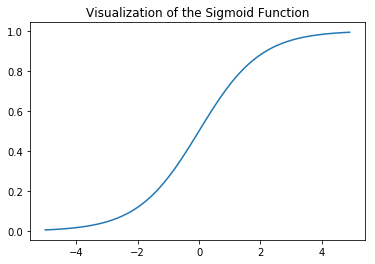

In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def sigmoid(z): 
    return 1 / (1 + np.exp( - z)) 
  
plt.plot(np.arange(-5, 5, 0.1), sigmoid(np.arange(-5, 5, 0.1))) 
plt.title('Visualization of the Sigmoid Function') 
  
plt.show() 

#### Let us import some libraries

In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder 

In [46]:
%cd C:\Users\Max\Documents\SMU\PythonForDeepLearningCourse\Week8

C:\Users\Max\Documents\SMU\PythonForDeepLearningCourse\Week8


#### Let us read in the data

In [8]:
data = pd.read_csv('IrisDataset.csv', header = None) 
print("Data Shape:", data.shape) 
  
print(data.head()) 

Data Shape: (100, 4)
   0    1    2  3
0  0  5.1  3.5  1
1  1  4.9  3.0  1
2  2  4.7  3.2  1
3  3  4.6  3.1  1
4  4  5.0  3.6  1


In [5]:
len(data)

100

In [ ]:
#notice the above just 2 features and last feature is the response Y (1 or 0)

In [9]:
data[3].value_counts()

1    50
0    50
Name: 3, dtype: int64

In [9]:
data.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [4]:
data.describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.471000,3.094000,0.500000
std,29.011492,0.641698,0.476057,0.502519
min,0.000000,4.300000,2.000000,0.000000
25%,24.750000,5.000000,2.800000,0.000000
50%,49.500000,5.400000,3.050000,0.500000
75%,74.250000,5.900000,3.400000,1.000000
max,99.000000,7.000000,4.400000,1.000000


#### Let us visualize the shape of our data

In [10]:
# Feature Matrix 
x_orig = data.iloc[:, 1:-1].values 
  
# Data labels 
y_orig = data.iloc[:, -1:].values 
  
print("Shape of Feature Matrix:", x_orig.shape) 
print("Shape Label Vector:", y_orig.shape) 

Shape of Feature Matrix: (100, 2)
Shape Label Vector: (100, 1)


In [ ]:
#above is just for the numeric features

In [11]:
x_orig[0:5, 0:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

#### Let us plot the 1's and 0's of our true labels: 

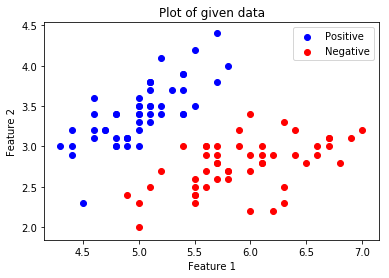

In [12]:
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 
  
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of given data') 
plt.legend() 
  
plt.show() 

#### let us represent the y using one hot encoding: 

In [14]:
# Creating the One Hot Encoder 
oneHot = OneHotEncoder() 
x=x_orig
# Encoding y_orig 
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 
  
alpha, epochs = 0.0035, 500
#note that the number of epochs to be used below is equal to the number of iterations, i.e. the number of times to traverse
#the entire training set. This will become very important in deep learning.
m, n = x.shape 
print('m =', m) 
print('n =', n) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs) 

m = 100
n = 2
Learning Rate = 0.0035
Number of Epochs = 500


C:\Users\Max\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


#### Create placeholders and define variables

In [22]:
# There are n columns in the feature matrix 
# after One Hot Encoding. 
X = tf.placeholder(tf.float32, [None, n]) 
  
# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, 2]) 
  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 2])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([2])) 

#### Define the cost function and the optimizer

In [26]:
# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
  
# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
                    logits = Y_hat, labels = Y) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
         learning_rate = alpha).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

#### Run the model

In [21]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
          
        # Running the Optimizer 
        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Calculating cost on current Epoch 
        c = sess.run(cost, feed_dict = {X : x, Y : y}) 
          
        # Calculating accuracy on current Epoch 
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                          tf.argmax(Y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                 tf.float32)) 
          
        # Storing Cost and Accuracy to the history 
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
          
        # Displaying result on current Epoch 
        if epoch % 100 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1])) 
      
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
      
    # Final Accuracy 
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                      tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,  
                                             tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%") 

Epoch 100 Cost: 126.09621047973633
Epoch 200 Cost: 117.69898986816406
Epoch 300 Cost: 113.7313117980957
Epoch 400 Cost: 111.48718643188477

Accuracy: 99.00000095367432 %


In [39]:
# Starting the Tensorflow Session - this time we add a batch parameter, so that we can run the model in batches. Note that
#batch size of 100 is the full batch. 
BATCH_SIZE = 50
epochs = 500
train_count=len(x)
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
        step = 0
        for start, end in zip(range(0, train_count, BATCH_SIZE),
                      range(BATCH_SIZE, train_count + 1,BATCH_SIZE)): #this creates a tuple of indices on which to train
                      #the model at each step

            step+=1
            
            # Running the Optimizer 
            sess.run(optimizer, feed_dict = {X : x[start:end], 
                                             Y : y[start:end]}) 

            # Calculating cost on current Epoch 
            c = sess.run(cost, feed_dict = {X : x[start:end], 
                                            Y : y[start:end]}) 

            # Calculating accuracy on current Epoch 
            correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                              tf.argmax(Y, 1)) 
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                     tf.float32)) 

            # Storing Cost and Accuracy to the history 
            cost_history.append(sum(sum(c))) 
            accuracy_history.append(accuracy.eval({X:x[start:end],Y:y[start:end]}) * 100) 

            # Displaying result on every 100th epoch
            if epoch % 100 == 0 and epoch != 0: 
                print("Epoch " + str(epoch) + " Step " + str(step) + " Cost: "
                                + str(cost_history[-1])) 
      
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
      
    # Final Accuracy 
    #notice below that Y_hat was defined earlier but only evaluated now using the optimal weight and bias
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                      tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,  
                                             tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%") 

Epoch 100 Step 1 Cost: 62.163902282714844
Epoch 100 Step 2 Cost: 70.82825469970703
Epoch 200 Step 1 Cost: 58.66379928588867
Epoch 200 Step 2 Cost: 60.9302864074707
Epoch 300 Step 1 Cost: 56.868473052978516
Epoch 300 Step 2 Cost: 56.4270076751709
Epoch 400 Step 1 Cost: 55.654916763305664
Epoch 400 Step 2 Cost: 55.119558334350586

Accuracy: 100.0 %


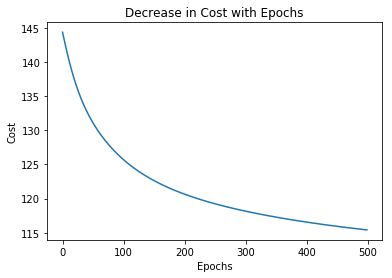

In [54]:
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 

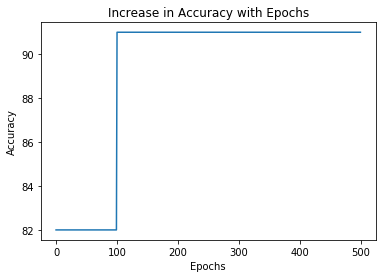

In [55]:
plt.plot(list(range(epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 
  
plt.show() 

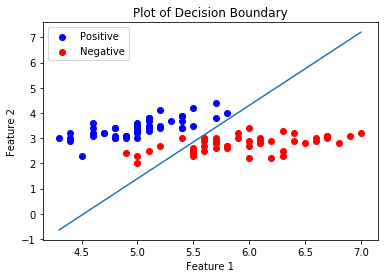

In [57]:
# Calculating the Decision Boundary 
decision_boundary_x = np.array([np.min(x_orig[:, 0]), 
                               np.max(x_orig[:, 0])]) 
  
decision_boundary_y = (- 1.0 / Weight[0]) *\
      (decision_boundary_x * Weight + Bias) 
  
decision_boundary_y = [sum(decision_boundary_y[:, 0]),  
                       sum(decision_boundary_y[:, 1])] 
  
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig))  
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], 
  color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], 
   color = 'red', label = 'Negative') 
  
# Plotting the Decision Boundary 
plt.plot(decision_boundary_x, decision_boundary_y) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of Decision Boundary') 
plt.legend() 
  
plt.show() 

### End Logistic Regression Example with Tensor Flow